### Archivo plano

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import requests
from bs4 import BeautifulSoup

from deep_translator import GoogleTranslator


### Archivo plano: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

In [124]:
df_total = pd.read_csv("world-data-2023.csv")

densidad_data = df_total.loc[:, df_total.isnull().sum() < 1]
densidad_data = densidad_data.rename(columns={'Country':'pais', 'Density\n(P/Km2)': 'Densidad(P/Km2)-2023'}) 
densidad_data

,pais,Densidad(P/Km2)-2023
0,Afghanistan,60
1,Albania,105
2,Algeria,18
3,Andorra,164
4,Angola,26
...,...,...
190,Venezuela,32
191,Vietnam,314
192,Yemen,56
193,Zambia,25


In [125]:
densidad_data['pais'] = densidad_data['pais'].apply(lambda x: GoogleTranslator(source='en', target='es').translate(x))

densidad_data

,pais,Densidad(P/Km2)-2023
0,Afganistán,60
1,Albania,105
2,Argelia,18
3,Andorra,164
4,Angola,26
...,...,...
190,Venezuela,32
191,Vietnam,314
192,Yemen,56
193,Zambia,25


In [126]:
densidad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   pais                  195 non-null    object
 1   Densidad(P/Km2)-2023  195 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [127]:
pais_densidad = []
for c in densidad_data['pais']:
    pais_densidad.append(c)

print(pais_densidad)

['Afganistán', 'Albania', 'Argelia', 'Andorra', 'Angola', 'Antigua y Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Las bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bielorrusia', 'Bélgica', 'Belgo', 'Benin', 'Bután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Costa marfil', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'República Centroafricana', 'Chad', 'Chile', 'Porcelana', 'Colombia', 'Comoras', 'República del Congo', 'Costa Rica', 'Croacia', 'Cuba', 'Chipre', 'República Checa', 'República Democrática del Congo', 'Dinamarca', 'Djibouti', 'Dominio', 'República Dominicana', 'Ecuador', 'Egipto', 'El Salvador', 'Guinea Ecuatorial', 'Eritrea', 'Estonia', 'Eswatini', 'Etiopía', 'Fiji', 'Finlandia', 'Francia', 'Gabón', 'La gambia', 'Georgia', 'Alemania', 'Ghana', 'Grecia', 'Granada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guayana', 'Haití', 'Ciudad del Vaticano', 'Honduras', 'Hungría', 'Islandia'

## Web Scraping

### 1. Recolectando la columna Espranza de Vida "EV" del sitio web https://www.indexmundi.com/es/datos/indicadores/SP.DYN.LE00.IN/rankings

In [128]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://www.indexmundi.com/es/datos/indicadores/SP.DYN.LE00.IN/rankings'
html = urlopen(url)
bs = BeautifulSoup(html.read(), 'html.parser')
all_text = bs.find_all('tr')
country_names = []
ev_numbers = []
for info in all_text:
    # Buscar el elemento <a> dentro de cada fila <tr>
    country_tag = info.find('a')
    if country_tag:
        country_names.append(country_tag.text.strip())
    # Buscar el elemento <a> dentro de cada fila <tr>
    ev_tag = info.find('td', {'class': 'r'})
    if ev_tag:
        ev_numbers.append(ev_tag.text.strip())

pais_ev = []
country_sorted = sorted(country_names)
for country in country_sorted:
    pais_ev.append(country)


country_egipto = "Egipto, República Árabe de"
country_bahrain = "Bahrein"
country_butan = "Bhután"
country_kenia = "Kenya"
country_iran = "Irán, República Islámica del"
country_lesoto = "Lesotho"
country_nueva_zelandia = "Nueva Zelandia"
country_papua_nguinea = "Papua Nueva Guinea"
country_ruanda = "Rwanda"
country_tanzania = "Tanzanía"
for i, country in enumerate(country_names):
    if country == country_egipto:
        country_names[i] = 'Egipto'

    if country == country_bahrain:
        country_names[i] = 'Bahrain'

    if country == country_butan:
        country_names[i] = 'Bután'

    if country == country_iran:
        country_names[i] = 'Irán'

    if country == country_kenia:
        country_names[i] = 'Kenia'

    if country == country_lesoto:
        country_names[i] = 'Lesotho'

    if country == country_nueva_zelandia:
        country_names[i] = 'Nueva Zelanda'

    if country == country_papua_nguinea:
        country_names[i] = 'Papúa Nueva Guinea'

    if country == country_ruanda:
        country_names[i] = 'Ruanda'

    if country == country_ruanda:
        country_names[i] = 'Tanzania'


ev_data = pd.DataFrame({'pais': country_names, 'EV(age)-2020': ev_numbers})
print(pais_ev)


['Afganistán', 'Albania', 'Alemania', 'Angola', 'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrein', 'Bangladesh', 'Barbados', 'Belarús', 'Belice', 'Benin', 'Bhután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bélgica', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Chad', 'Chile', 'China', 'Chipre', 'Colombia', 'Comoras', 'Congo, República del', 'Corea, República Popular Democrática de', 'Corea, República de', 'Costa Rica', 'Croacia', 'Cuba', "Côte d'Ivoire", 'Dinamarca', 'Djibouti', 'Dominica', 'Ecuador', 'Egipto, República Árabe de', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovenia', 'España', 'Estados Unidos', 'Estonia', 'Etiopía', 'Ex República Yugoslava de Macedonia', 'Federación de Rusia', 'Fiji', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Granada', 'Grecia', 'Groenlandia', 'Gua

In [129]:
print(pais_densidad)

['Afganistán', 'Albania', 'Argelia', 'Andorra', 'Angola', 'Antigua y Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Las bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bielorrusia', 'Bélgica', 'Belgo', 'Benin', 'Bután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Costa marfil', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'República Centroafricana', 'Chad', 'Chile', 'Porcelana', 'Colombia', 'Comoras', 'República del Congo', 'Costa Rica', 'Croacia', 'Cuba', 'Chipre', 'República Checa', 'República Democrática del Congo', 'Dinamarca', 'Djibouti', 'Dominio', 'República Dominicana', 'Ecuador', 'Egipto', 'El Salvador', 'Guinea Ecuatorial', 'Eritrea', 'Estonia', 'Eswatini', 'Etiopía', 'Fiji', 'Finlandia', 'Francia', 'Gabón', 'La gambia', 'Georgia', 'Alemania', 'Ghana', 'Grecia', 'Granada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guayana', 'Haití', 'Ciudad del Vaticano', 'Honduras', 'Hungría', 'Islandia'

In [130]:
ev_data.isnull().sum()

pais            0
EV(age)-2020    0
dtype: int64

In [131]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pais          187 non-null    object
 1   EV(age)-2020  187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


## Recolectando datos del Fondo Monetario Internacional. 
### PIB  2023
#### link de la pagina web (https://datosmacro.expansion.com/paises/grupos/fmi)

In [132]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://datosmacro.expansion.com/paises/grupos/fmi'
html = urlopen(url)
bs = BeautifulSoup(html.read(), 'html.parser')

# Encontrar todas las filas de la tabla
all_rows = bs.find_all('tr')

country_names = []
pib_values = []
idh_values = []
idh_values = []

for row in all_rows:
    country_tag = row.find('a', href=True)
    if country_tag and '/paises/' in country_tag['href']:
        # Extraer el nombre del país eliminando el '[+]'
        country_name = country_tag.text.replace(' [+]', '').strip()
        country_names.append(country_name)
    else:
        country_names.append(None)

    # Buscar el primer <td> con la clase 'numero eur'
    pib_tag = row.find('td', class_='numero eur')
    if pib_tag:
        # Extraer el valor del PIB eliminando el signo de euro
        gdp_value = pib_tag['data-value'].strip()
        pib_values.append(gdp_value)
    else:
        pib_values.append(None)  # Si no se encuentra el PIB, añadir None

country_banglades = "Bangladés"
country_barein = "Baréin"
country_botsuana = "Botsuana"
country_fiyi = "Fiyi"
country_kazajistan = "Kazajistán"
country_malaui = "Malaui"

for i, country in enumerate(country_names):
    if country == country_banglades:
        country_names[i] = 'Bangladesh'
    if country == country_barein:
        country_names[i] = 'Bahrain'
    if country == country_botsuana:
        country_names[i] = 'Botswana'
    if country == country_fiyi:
        country_names[i] = 'Fiji'
    if country == country_malaui:
        country_names[i] = 'Malawi'
    if country == country_kazajistan:
        country_names[i] = 'Kazajstán'

# Bangladés - Bangladesh
# Baréin - Bahrain
# Botsuana - Botswana
# Fiyi - Fiji 
# Kazajistán - Kazajstán
# 'Malaui' - Malawi


pib_values.pop(0)
pib_values.pop(-1)

country_names.pop(0)
country_names.pop(-1)

pib_data = pd.DataFrame({'pais': country_names, 'PIB(anual, Eur)-2023': pib_values})
pib_data





,pais,"PIB(anual, Eur)-2023"
0,Afganistán,16022
1,Albania,25122
2,Alemania,4305260
3,Angola,83029
4,Antigua y Barbuda,1880
...,...,...
183,Viet Nam,400989
184,Yemen,22331
185,Yibuti,3790
186,Zambia,25482


In [133]:
pais_pib = sorted(pib_data['pais'])
print(pais_pib)

['Afganistán', 'Albania', 'Alemania', 'Angola', 'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belice', 'Benin', 'Bielorrusia', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunéi', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bután', 'Bélgica', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Catar', 'Chad', 'Chequia', 'Chile', 'China', 'Chipre', 'Colombia', 'Comoras', 'Corea del Sur', 'Costa Rica', 'Costa de Marfil', 'Croacia', 'Dinamarca', 'Dominica', 'Ecuador', 'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovaquia', 'Eslovenia', 'España', 'Estados Federados de Micronesia', 'Estados Unidos', 'Estonia', 'Eswatini', 'Etiopía', 'Fiji', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Granada', 'Grecia', 'Guatemala', 'Guinea', 'Guinea Ecuatorial', 'Guinea-Bisáu', 'Guyana', 'Haití', 'Honduras', 'Hong Kong', 'Hungría', 'Ind

In [134]:
pib_data.isnull().sum()

pais                    0
PIB(anual, Eur)-2023    0
dtype: int64

In [135]:
data = pd.merge(densidad_data, pib_data, on="pais")
data

,pais,Densidad(P/Km2)-2023,"PIB(anual, Eur)-2023"
0,Afganistán,60,16022
1,Albania,105,25122
2,Argelia,18,221957
3,Angola,26,83029
4,Antigua y Barbuda,223,1880
...,...,...,...
157,Vanuatu,25,1042
158,Venezuela,32,86349
159,Yemen,56,22331
160,Zambia,25,25482


### Api de Data Bank
#### De los siguientes sitios:
##### https://datos.bancomundial.org/indicador/IT.NET.USER.ZS  Acceso a Internet
##### https://datos.bancomundial.org/indicador/FP.CPI.TOTL.ZG  Inflacion

In [136]:
import requests
import pandas as pd
from deep_translator import GoogleTranslator

# Definir el indicador que se desea obtener
indicators = {
    'Acceso a Internet': 'IT.NET.USER.ZS',
}

# URL base de la API
url = "https://api.worldbank.org/v2/country/all/indicator/"

all_data = []

for indicator_name, indicator_code in indicators.items():
    print(f"Obteniendo datos para: {indicator_name}")
    page = 1
    while True:
        params = {
            "format": "json",
            "per_page": 500,
            "page": page
        }
        
        response = requests.get(url + indicator_code, params=params)
        
        # Manejo de errores
        if response.status_code != 200:
            print(f"Error en la solicitud: {response.status_code}")
            break
        
        data = response.json()
        
        if len(data) < 2 or not data[1]:
            break

        # Filtrar datos para el año 2023
        for entry in data[1]:
            if entry['date'] == '2023' and entry['value'] is not None:
                country_name = entry['country']['value']
                # Traducir el nombre del país a español
                translated_name = GoogleTranslator(source='en', target='es').translate(country_name)
                all_data.append({
                    'pais': translated_name,
                    'value': entry['value'],
                    'date': entry['date']
                })

        page += 1

# Crear DataFrame con los datos filtrados
internet_df = pd.DataFrame(all_data)

# Mostrar el DataFrame
print(internet_df)

Obteniendo datos para: Acceso a Internet
                           pais  value  date
0                Altos ingresos   92.3  2023
1                Bajos ingresos   24.4  2023
2     Ingresos medios más bajos   50.9  2023
3    Ingresos medios superiores   78.5  2023
4                         Mundo   65.4  2023
..                          ...    ...   ...
181                     Vanuatu   45.7  2023
182                     Vietnam   78.1  2023
183          Cisjordania y Gaza   86.6  2023
184                      Zambia   33.0  2023
185                    Zimbabue   38.4  2023

[186 rows x 3 columns]


In [137]:
import requests
import pandas as pd

# Definir el indicador que se desea obtener
indicators = {
    'Inflación': 'FP.CPI.TOTL.ZG',
}

# URL base de la API
url = "https://api.worldbank.org/v2/country/all/indicator/"

all_data = []

for indicator_name, indicator_code in indicators.items():
    print(f"Obteniendo datos para: {indicator_name}")
    page = 1
    while True:
        params = {
            "format": "json",
            "per_page": 500,
            "page": page
        }
        
        response = requests.get(url + indicator_code, params=params)
        
        # Manejo de errores
        if response.status_code != 200:
            print(f"Error en la solicitud: {response.status_code}")
            break
        
        data = response.json()
        
        if len(data) < 2 or not data[1]:
            break

        # Filtrar datos para el año 2023
        for entry in data[1]:
            if entry['date'] == '2023' and entry['value'] is not None:
                country_name = entry['country']['value']
                # Traducir el nombre del país a español
                translated_name = GoogleTranslator(source='en', target='es').translate(country_name)
                all_data.append({
                    'pais': translated_name,
                    'value': entry['value'],
                    'date': entry['date']
                })

        page += 1

# Crear DataFrame con los datos filtrados
inflacion_df = pd.DataFrame(all_data)

# Mostrar el DataFrame
print(inflacion_df)

Obteniendo datos para: Inflación
                              pais      value  date
0            África oriental y sur   7.126975  2023
1      África occidental y central   4.953050  2023
2                      Mundo árabe   3.642164  2023
3      Estados pequeños del Caribe   4.227693  2023
4    Europa central y los bálticos   9.442841  2023
..                             ...        ...   ...
206                 Estados Unidos   4.116338  2023
207                        Uruguay   5.869104  2023
208                        Vietnam   3.252893  2023
209             Cisjordania y Gaza   5.871102  2023
210                         Zambia  10.884532  2023

[211 rows x 3 columns]


In [138]:
internet_df = internet_df.rename(columns={'value':'internet(%)-2023'})
inflacion_df = inflacion_df.rename(columns={'value':'inflacion(%)-2023'})

In [139]:
internet_df = internet_df.drop(columns=['date'])
inflacion_df = inflacion_df.drop(columns=['date'])

In [140]:
inflacion_internet = pd.merge(internet_df, inflacion_df, on=['pais'])
inflacion_internet

,pais,internet(%)-2023,inflacion(%)-2023
0,Altos ingresos,92.3,4.821467
1,Bajos ingresos,24.4,9.984390
2,Ingresos medios más bajos,50.9,6.889006
3,Ingresos medios superiores,78.5,4.944324
4,Mundo,65.4,5.635669
...,...,...,...
157,Estados Unidos,93.1,4.116338
158,Uruguay,89.9,5.869104
159,Vietnam,78.1,3.252893
160,Cisjordania y Gaza,86.6,5.871102


In [141]:
inflacion_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               162 non-null    object 
 1   internet(%)-2023   162 non-null    float64
 2   inflacion(%)-2023  162 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [143]:
inflacion_internet['internet(%)-2023'] = inflacion_internet['internet(%)-2023'].astype(object)
inflacion_internet['inflacion(%)-2023'] = inflacion_internet['inflacion(%)-2023'].astype(object)

In [144]:
inflacion_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pais               162 non-null    object
 1   internet(%)-2023   162 non-null    object
 2   inflacion(%)-2023  162 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [145]:
inflacion_internet.isnull().sum()

pais                 0
internet(%)-2023     0
inflacion(%)-2023    0
dtype: int64

In [146]:
country_bahamas = "Bahamas, el"
country_dominio = "Dominio"
country_egipto = "Egipto, representante árabe."
country_gambia = "Gambia, el"
country_guyana= "Guayana"
country_iran = "Irán, representante islámico."
country_kirguistan = "República Kirguistán"
country_rumania = "Rumania"

inflacion_internet.loc[inflacion_internet['pais'] == country_bahamas, 'pais'] = "Bahamas"
inflacion_internet.loc[inflacion_internet['pais'] == country_dominio, 'pais'] = "Dominica"
inflacion_internet.loc[inflacion_internet['pais'] == country_egipto, 'pais'] = "Egipto"
inflacion_internet.loc[inflacion_internet['pais'] == country_gambia, 'pais'] = "Gambia"
inflacion_internet.loc[inflacion_internet['pais'] == country_guyana, 'pais'] = "Guyana"
inflacion_internet.loc[inflacion_internet['pais'] == country_iran, 'pais'] = "Irán"
inflacion_internet.loc[inflacion_internet['pais'] == country_kirguistan, 'pais'] = "Kirguistán"
inflacion_internet.loc[inflacion_internet['pais'] == country_rumania, 'pais'] = "Rumanía"

# Bahamas, el - Bahamas
# Dominio - Dominica
# 'Egipto, representante árabe.' - 'Egipto'
# 'Gambia, el' - Gambia
# Guayana - Guyana
# 'Irán, representante islámico.' - Irán
# 'República Kirguistán' - 'Kirguistán'
# Rumania - Rumanía


In [148]:
paises_muestra = []
for e in inflacion_internet['pais']:
    paises_muestra.append(e)

print(paises_muestra)
# Bahamas, el - Bahamas
# Dominio - Dominica
# 'Egipto, representante árabe.' - 'Egipto'
# 'Gambia, el' - Gambia
# Guayana - Guyana
# 'Irán, representante islámico.' - Irán
# 'República Kirguistán' - 'Kirguistán'
# Rumania - Rumanía


['Altos ingresos', 'Bajos ingresos', 'Ingresos medios más bajos', 'Ingresos medios superiores', 'Mundo', 'Albania', 'Argelia', 'Angola', 'Antigua y Barbuda', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bielorrusia', 'Bélgica', 'Belgo', 'Benin', 'Bután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Chad', 'Chile', 'Porcelana', 'Colombia', 'Congo, Rep.', 'Costa Rica', 'Costa de Marfil', 'Croacia', 'Chipre', 'Chequia', 'Dinamarca', 'Djibouti', 'Dominica', 'República Dominicana', 'Ecuador', 'Egipto', 'El Salvador', 'Estonia', 'Fiji', 'Finlandia', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Alemania', 'Ghana', 'Grecia', 'Granada', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong SAR, China', 'Hungría', 'Islandia', 'Indonesia', 'Irán', 'Irak', 'Irlanda', 'Israel', 'Italia', 'Jamaica', 'Japón', 'Jordán', 'Kazajstán', 'Kenia', 'Kir

In [149]:
print(pais_ev) # true

# Bahrein - Bahrain
# Bhután - Bután
# 'Egipto, República Árabe de' - 'Egipto'
# 'Irán, República Islámica del' - 'Irán'
# Kenya - Kenia
# Lesotho - Lesoto
# 'Nueva Zelandia' - 'Nueva Zelanda'
# 'Papua Nueva Guinea' - 'Papúa Nueva Guinea'
# Rwanda - Ruanda
# Tanzanía - Tanzania

['Afganistán', 'Albania', 'Alemania', 'Angola', 'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrein', 'Bangladesh', 'Barbados', 'Belarús', 'Belice', 'Benin', 'Bhután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bélgica', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Chad', 'Chile', 'China', 'Chipre', 'Colombia', 'Comoras', 'Congo, República del', 'Corea, República Popular Democrática de', 'Corea, República de', 'Costa Rica', 'Croacia', 'Cuba', "Côte d'Ivoire", 'Dinamarca', 'Djibouti', 'Dominica', 'Ecuador', 'Egipto, República Árabe de', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovenia', 'España', 'Estados Unidos', 'Estonia', 'Etiopía', 'Ex República Yugoslava de Macedonia', 'Federación de Rusia', 'Fiji', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Granada', 'Grecia', 'Groenlandia', 'Gua

In [150]:
print(pais_pib) # true

# Bangladés - Bangladesh
# Baréin - Bahrain
# Botsuana - Botswana
# Fiyi - Fiji 
# Kazajistán - Kazajstán
# 'Malaui' - Malawi

['Afganistán', 'Albania', 'Alemania', 'Angola', 'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belice', 'Benin', 'Bielorrusia', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunéi', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bután', 'Bélgica', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Catar', 'Chad', 'Chequia', 'Chile', 'China', 'Chipre', 'Colombia', 'Comoras', 'Corea del Sur', 'Costa Rica', 'Costa de Marfil', 'Croacia', 'Dinamarca', 'Dominica', 'Ecuador', 'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovaquia', 'Eslovenia', 'España', 'Estados Federados de Micronesia', 'Estados Unidos', 'Estonia', 'Eswatini', 'Etiopía', 'Fiji', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Granada', 'Grecia', 'Guatemala', 'Guinea', 'Guinea Ecuatorial', 'Guinea-Bisáu', 'Guyana', 'Haití', 'Honduras', 'Hong Kong', 'Hungría', 'Ind

In [152]:
print(pais_densidad)
# las Bahamas - Bahamas
# Dominio - Dominica
# La gambia - Gambia
# Guayana - Guyana


['Afganistán', 'Albania', 'Argelia', 'Andorra', 'Angola', 'Antigua y Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Las bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bielorrusia', 'Bélgica', 'Belgo', 'Benin', 'Bután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Costa marfil', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'República Centroafricana', 'Chad', 'Chile', 'Porcelana', 'Colombia', 'Comoras', 'República del Congo', 'Costa Rica', 'Croacia', 'Cuba', 'Chipre', 'República Checa', 'República Democrática del Congo', 'Dinamarca', 'Djibouti', 'Dominio', 'República Dominicana', 'Ecuador', 'Egipto', 'El Salvador', 'Guinea Ecuatorial', 'Eritrea', 'Estonia', 'Eswatini', 'Etiopía', 'Fiji', 'Finlandia', 'Francia', 'Gabón', 'La gambia', 'Georgia', 'Alemania', 'Ghana', 'Grecia', 'Granada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guayana', 'Haití', 'Ciudad del Vaticano', 'Honduras', 'Hungría', 'Islandia'

In [154]:
# las Bahamas - Bahamas
# Dominio - Dominica
# La gambia - Gambia
# Guayana - Guyana 

country_bahamas = "las Bahamas"
country_dominio = "Dominio"
country_gambia = "La gambia"
country_guayana = "Guayana"

densidad_data.loc[densidad_data['pais'] == country_bahamas, 'pais'] = "Bahamas"
densidad_data.loc[densidad_data['pais'] == country_dominio, 'pais'] = "Dominica"
densidad_data.loc[densidad_data['pais'] == country_gambia, 'pais'] = "Gambia"
densidad_data.loc[densidad_data['pais'] == country_guayana, 'pais'] = "Guyana"

In [155]:
data = pd.merge(densidad_data, ev_data, on="pais")
data

,pais,Densidad(P/Km2)-2023,EV(age)-2020
0,Afganistán,60,65.17
1,Albania,105,78.69
2,Argelia,18,77.06
3,Angola,26,61.49
4,Antigua y Barbuda,223,77.15
...,...,...,...
147,Uruguay,20,78.06
148,Uzbekistán,79,71.85
149,Vanuatu,25,70.62
150,Venezuela,32,72.07


In [156]:
data = pd.merge(data, inflacion_internet,on="pais")
data

,pais,Densidad(P/Km2)-2023,EV(age)-2020,internet(%)-2023,inflacion(%)-2023
0,Albania,105,78.69,83.1,4.759764
1,Argelia,18,77.06,76.9,9.322174
2,Angola,26,61.49,44.8,13.644102
3,Antigua y Barbuda,223,77.15,77.6,5.067139
4,Armenia,104,75.22,80.0,1.980419
...,...,...,...,...,...
122,Emiratos Árabes Unidos,118,78.12,100.0,1.626708
123,Reino Unido,281,80.90,96.3,6.793967
124,Estados Unidos,36,77.28,93.1,4.116338
125,Uruguay,20,78.06,89.9,5.869104


In [157]:
data = pd.merge(data, pib_data,on="pais")
data

,pais,Densidad(P/Km2)-2023,EV(age)-2020,internet(%)-2023,inflacion(%)-2023,"PIB(anual, Eur)-2023"
0,Albania,105,78.69,83.1,4.759764,25122
1,Argelia,18,77.06,76.9,9.322174,221957
2,Angola,26,61.49,44.8,13.644102,83029
3,Antigua y Barbuda,223,77.15,77.6,5.067139,1880
4,Armenia,104,75.22,80.0,1.980419,22262
...,...,...,...,...,...,...
121,Emiratos Árabes Unidos,118,78.12,100.0,1.626708,475351
122,Reino Unido,281,80.90,96.3,6.793967,3364019
123,Estados Unidos,36,77.28,93.1,4.116338,26962619
124,Uruguay,20,78.06,89.9,5.869104,71415


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   pais                  126 non-null    object
 1   Densidad(P/Km2)-2023  126 non-null    object
 2   EV(age)-2020          126 non-null    object
 3   internet(%)-2023      126 non-null    object
 4   inflacion(%)-2023     126 non-null    object
 5   PIB(anual, Eur)-2023  126 non-null    object
dtypes: object(6)
memory usage: 6.0+ KB


In [159]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame existente
# Mapeo de países a continentes
continent_mapping = {
    'Albania': 'Europa', 'Argelia': 'África', 'Angola': 'África', 'Antigua y Barbuda': 'América',
    'Armenia': 'Asia', 'Australia': 'Oceanía', 'Austria': 'Europa', 'Azerbaiyán': 'Asia',
    'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Barbados': 'América', 'Bélgica': 'Europa',
    'Benin': 'África', 'Bután': 'Asia', 'Bolivia': 'América', 'Bosnia y Herzegovina': 'Europa',
    'Botswana': 'África', 'Brasil': 'América', 'Bulgaria': 'Europa', 'Burkina Faso': 'África',
    'Burundi': 'África', 'Cabo Verde': 'África', 'Camboya': 'Asia', 'Camerún': 'África',
    'Canadá': 'América', 'Chad': 'África', 'Chile': 'América', 'Colombia': 'América',
    'Costa Rica': 'América', 'Croacia': 'Europa', 'Chipre': 'Asia', 'Dinamarca': 'Europa',
    'Dominica': 'América', 'República Dominicana': 'América', 'Ecuador': 'América', 'Egipto': 'África',
    'El Salvador': 'América', 'Estonia': 'Europa', 'Fiji': 'Oceanía', 'Finlandia': 'Europa',
    'Francia': 'Europa', 'Gabón': 'África', 'Gambia': 'África', 'Georgia': 'Asia',
    'Alemania': 'Europa', 'Ghana': 'África', 'Grecia': 'Europa', 'Granada': 'América',
    'Guinea': 'África', 'Guyana': 'América', 'Honduras': 'América', 'Hungría': 'Europa',
    'Islandia': 'Europa', 'Indonesia': 'Asia', 'Irán': 'Asia', 'Israel': 'Asia', 'Italia': 'Europa',
    'Jamaica': 'América', 'Japón': 'Asia', 'Kazajstán': 'Asia', 'Kenia': 'África', 'Kiribati': 'Oceanía',
    'Kuwait': 'Asia', 'Kirguistán': 'Asia', 'Letonia': 'Europa', 'Líbano': 'Asia', 'Liberia': 'África',
    'Libia': 'África', 'Lituania': 'Europa', 'Luxemburgo': 'Europa', 'Madagascar': 'África',
    'Malawi': 'África', 'Malasia': 'Asia', 'Malí': 'África', 'Malta': 'Europa', 'Mauritania': 'África',
    'Mauricio': 'África', 'México': 'América', 'Mongolia': 'Asia', 'Montenegro': 'Europa',
    'Marruecos': 'África', 'Mozambique': 'África', 'Namibia': 'África', 'Nepal': 'Asia',
    'Países Bajos': 'Europa', 'Nueva Zelanda': 'Oceanía', 'Nicaragua': 'América', 'Níger': 'África',
    'Nigeria': 'África', 'Noruega': 'Europa', 'Omán': 'Asia', 'Pakistán': 'Asia', 'Panamá': 'América',
    'Papúa Nueva Guinea': 'Oceanía', 'Paraguay': 'América', 'Perú': 'América', 'Filipinas': 'Asia',
    'Polonia': 'Europa', 'Portugal': 'Europa', 'Santa Lucía': 'América', 'San Vicente y las Granadinas': 'América',
    'Arabia Saudita': 'Asia', 'Senegal': 'África', 'Serbia': 'Europa', 'Seychelles': 'África',
    'Sierra Leona': 'África', 'Singapur': 'Asia', 'Eslovenia': 'Europa', 'Islas Salomón': 'Oceanía',
    'Sudáfrica': 'África', 'España': 'Europa', 'Sri Lanka': 'Asia', 'Suecia': 'Europa', 'Suiza': 'Europa',
    'Tanzania': 'África', 'Tailandia': 'Asia', 'Tonga': 'Oceanía', 'Trinidad y Tobago': 'América',
    'Túnez': 'África', 'Uganda': 'África', 'Ucrania': 'Europa', 'Emiratos Árabes Unidos': 'Asia',
    'Reino Unido': 'Europa', 'Estados Unidos': 'América', 'Uruguay': 'América', 'Zambia': 'África'
}

# Agregar la columna de continentes al DataFrame
data['continente'] = data['pais'].map(continent_mapping)

# Mostrar el DataFrame resultante
print(data.head())



                pais Densidad(P/Km2)-2023 EV(age)-2020 internet(%)-2023  \
0            Albania                  105        78.69             83.1   
1            Argelia                   18        77.06             76.9   
2             Angola                   26        61.49             44.8   
3  Antigua y Barbuda                  223        77.15             77.6   
4            Armenia                  104        75.22             80.0   

  inflacion(%)-2023 PIB(anual, Eur)-2023 continente  
0          4.759764                25122     Europa  
1          9.322174               221957     África  
2         13.644102                83029     África  
3          5.067139                 1880    América  
4          1.980419                22262       Asia  


In [161]:
data

,pais,Densidad(P/Km2)-2023,EV(age)-2020,internet(%)-2023,inflacion(%)-2023,"PIB(anual, Eur)-2023",continente
0,Albania,105,78.69,83.1,4.759764,25122,Europa
1,Argelia,18,77.06,76.9,9.322174,221957,África
2,Angola,26,61.49,44.8,13.644102,83029,África
3,Antigua y Barbuda,223,77.15,77.6,5.067139,1880,América
4,Armenia,104,75.22,80.0,1.980419,22262,Asia
...,...,...,...,...,...,...,...
121,Emiratos Árabes Unidos,118,78.12,100.0,1.626708,475351,Asia
122,Reino Unido,281,80.90,96.3,6.793967,3364019,Europa
123,Estados Unidos,36,77.28,93.1,4.116338,26962619,América
124,Uruguay,20,78.06,89.9,5.869104,71415,América


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   pais                  126 non-null    object
 1   Densidad(P/Km2)-2023  126 non-null    object
 2   EV(age)-2020          126 non-null    object
 3   internet(%)-2023      126 non-null    object
 4   inflacion(%)-2023     126 non-null    object
 5   PIB(anual, Eur)-2023  126 non-null    object
 6   continente            126 non-null    object
dtypes: object(7)
memory usage: 7.0+ KB


In [170]:
print(data.dtypes)

pais                     object
Densidad(P/Km2)-2023    float64
EV(age)-2020             object
internet(%)-2023        float64
inflacion(%)-2023       float64
PIB(anual, Eur)-2023     object
continente               object
dtype: object


In [173]:
data['EV(age)-2020'] = data['EV(age)-2020'].astype(float)
data

,pais,Densidad(P/Km2)-2023,EV(age)-2020,internet(%)-2023,inflacion(%)-2023,"PIB(anual, Eur)-2023",continente
0,Albania,105.0,78.69,83.1,4.759764,25122,Europa
1,Argelia,18.0,77.06,76.9,9.322174,221957,África
2,Angola,26.0,61.49,44.8,13.644102,83029,África
3,Antigua y Barbuda,223.0,77.15,77.6,5.067139,1880,América
4,Armenia,104.0,75.22,80.0,1.980419,22262,Asia
...,...,...,...,...,...,...,...
121,Emiratos Árabes Unidos,118.0,78.12,100.0,1.626708,475351,Asia
122,Reino Unido,281.0,80.90,96.3,6.793967,3364019,Europa
123,Estados Unidos,36.0,77.28,93.1,4.116338,26962619,América
124,Uruguay,20.0,78.06,89.9,5.869104,71415,América


In [174]:
data['PIB(anual, Eur)-2023'] = data['PIB(anual, Eur)-2023'].astype(float)
data

,pais,Densidad(P/Km2)-2023,EV(age)-2020,internet(%)-2023,inflacion(%)-2023,"PIB(anual, Eur)-2023",continente
0,Albania,105.0,78.69,83.1,4.759764,25122.0,Europa
1,Argelia,18.0,77.06,76.9,9.322174,221957.0,África
2,Angola,26.0,61.49,44.8,13.644102,83029.0,África
3,Antigua y Barbuda,223.0,77.15,77.6,5.067139,1880.0,América
4,Armenia,104.0,75.22,80.0,1.980419,22262.0,Asia
...,...,...,...,...,...,...,...
121,Emiratos Árabes Unidos,118.0,78.12,100.0,1.626708,475351.0,Asia
122,Reino Unido,281.0,80.90,96.3,6.793967,3364019.0,Europa
123,Estados Unidos,36.0,77.28,93.1,4.116338,26962619.0,América
124,Uruguay,20.0,78.06,89.9,5.869104,71415.0,América


In [175]:
print(data.dtypes)

pais                     object
Densidad(P/Km2)-2023    float64
EV(age)-2020            float64
internet(%)-2023        float64
inflacion(%)-2023       float64
PIB(anual, Eur)-2023    float64
continente               object
dtype: object


### EDA

In [176]:
types = [str(tipo) for tipo in data.dtypes.values]
vars = list(data.dtypes.index)

In [177]:
var_cualit = [vars[i] for i, tipo in enumerate(types) if tipo == "object"]
var_cualit

['pais', 'continente']

In [178]:
var_cuanti =  [vars[i] for i, tipo in enumerate(types) if tipo != "object"]
var_cuanti

['Densidad(P/Km2)-2023',
 'EV(age)-2020',
 'internet(%)-2023',
 'inflacion(%)-2023',
 'PIB(anual, Eur)-2023']

In [179]:
data[var_cuanti]. describe()

,Densidad(P/Km2)-2023,EV(age)-2020,internet(%)-2023,inflacion(%)-2023,"PIB(anual, Eur)-2023"
count,126.000000,126.000000,126.000000,126.000000,1.260000e+02
mean,228.468254,73.733254,73.128571,9.510157,5.618773e+05
std,780.164369,6.988102,24.739254,20.639235,2.484071e+06
min,2.000000,54.510000,11.100000,-1.035301,2.580000e+02
25%,27.000000,70.027500,61.625000,3.706824,1.834200e+04
50%,91.500000,75.175000,82.700000,5.801133,6.692050e+04
75%,212.000000,78.597500,90.850000,9.072501,3.363180e+05
max,8358.000000,84.620000,100.000000,221.341644,2.696262e+07


In [206]:
pais_filtrado = data.loc[data['Densidad(P/Km2)-2023'] == 8358.00, 'pais']
print(pais_filtrado)


106    Singapur
Name: pais, dtype: object


In [207]:
densidad_filtrada= data.loc[data['pais'] == 'Bolivia', 'Densidad(P/Km2)-2023']
print(densidad_filtrada)

14    11.0
Name: Densidad(P/Km2)-2023, dtype: float64


In [180]:
descriptivo = data[var_cuanti].describe().transpose().reset_index().rename(columns={"index": "Variable"})
descriptivo

,Variable,count,mean,std,min,25%,50%,75%,max
0,Densidad(P/Km2)-2023,126.0,228.468254,7.801644e+02,2.000000,27.000000,91.500000,212.000000,8.358000e+03
1,EV(age)-2020,126.0,73.733254,6.988102e+00,54.510000,70.027500,75.175000,78.597500,8.462000e+01
2,internet(%)-2023,126.0,73.128571,2.473925e+01,11.100000,61.625000,82.700000,90.850000,1.000000e+02
3,inflacion(%)-2023,126.0,9.510157,2.063924e+01,-1.035301,3.706824,5.801133,9.072501,2.213416e+02
4,"PIB(anual, Eur)-2023",126.0,561877.349206,2.484071e+06,258.000000,18342.000000,66920.500000,336318.000000,2.696262e+07


<Axes: ylabel='Frequency'>

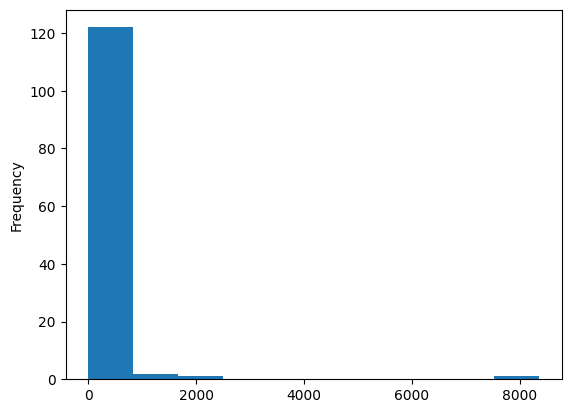

In [181]:
data['Densidad(P/Km2)-2023'].plot(kind="hist")

<Axes: >

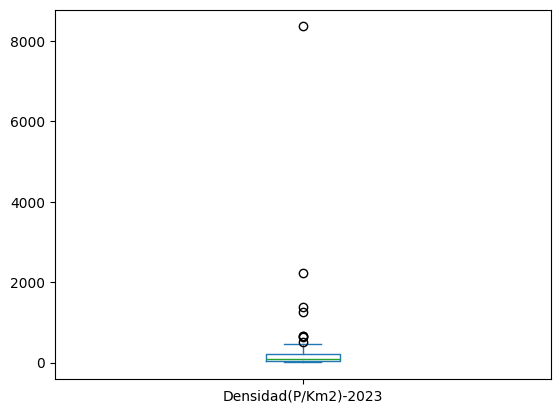

In [186]:
data['Densidad(P/Km2)-2023'].plot(kind="box")

<Axes: ylabel='Frequency'>

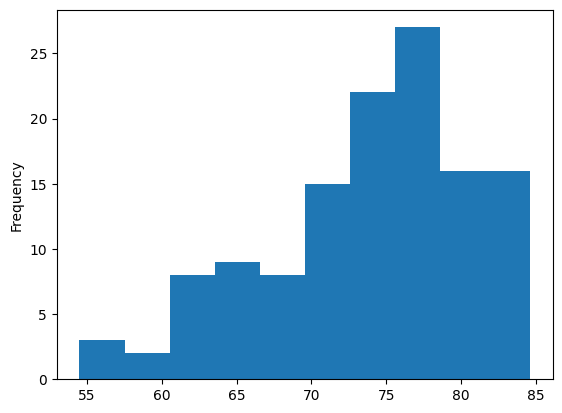

In [182]:
data['EV(age)-2020'].plot(kind="hist")

In [210]:
pais_filtrado = data.loc[data['EV(age)-2020'] == data['EV(age)-2020'].min(), 'pais'] 
continente_filtrado = data.loc[data['EV(age)-2020'] == data['EV(age)-2020'].min(), 'continente']
print(pais_filtrado, data['EV(age)-2020'].min(), continente_filtrado)

25    Chad
Name: pais, dtype: object 54.51 25    África
Name: continente, dtype: object


In [212]:
pais_filtrado = data.loc[data['EV(age)-2020'] == data['EV(age)-2020'].max(), 'pais'] 
continente_filtrado = data.loc[data['EV(age)-2020'] == data['EV(age)-2020'].max(), 'continente']
print(pais_filtrado, data['EV(age)-2020'].max(), continente_filtrado)

58    Japón
Name: pais, dtype: object 84.62 58    Asia
Name: continente, dtype: object


<Axes: >

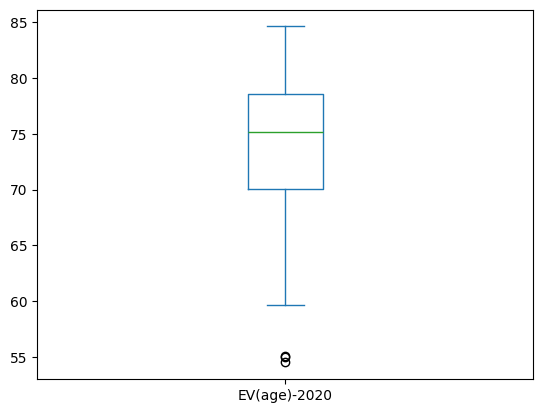

In [187]:
data['EV(age)-2020'].plot(kind="box")

<Axes: ylabel='Frequency'>

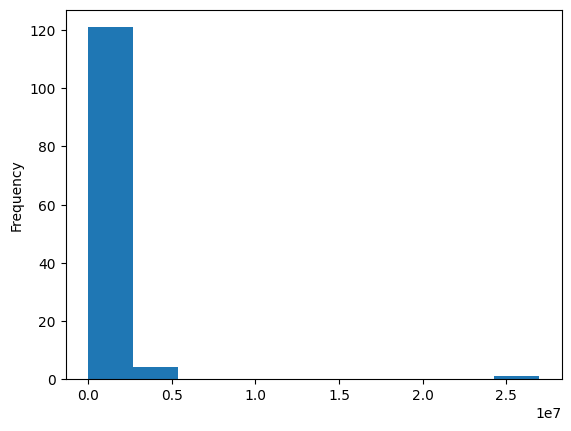

In [ ]:
data['PIB(anual, Eur)-2023'].plot(kind="hist")

<Axes: >

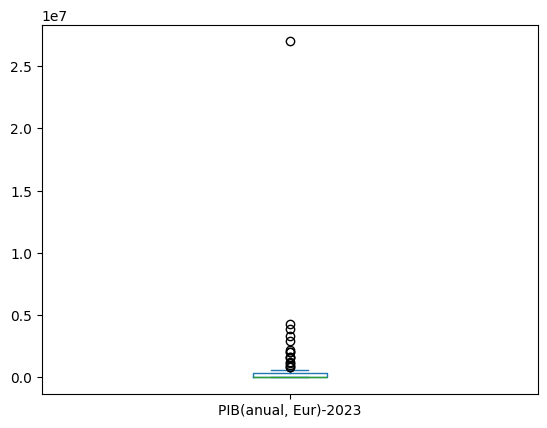

In [188]:
data['PIB(anual, Eur)-2023'].plot(kind="box")

<Axes: ylabel='Frequency'>

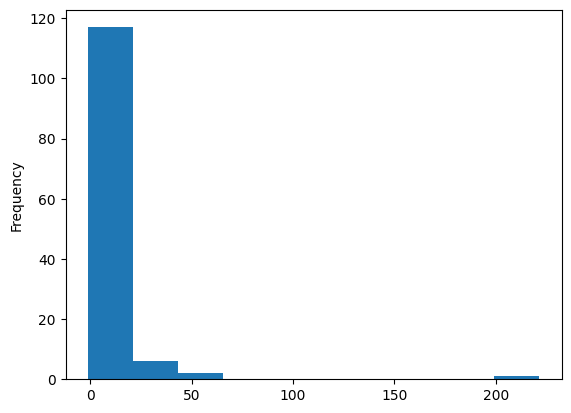

In [189]:
data['inflacion(%)-2023'].plot(kind="hist")

<Axes: >

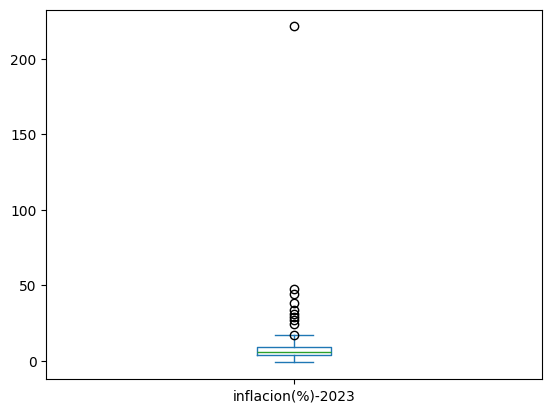

In [ ]:
data['inflacion(%)-2023'].plot(kind="box")

<Axes: ylabel='Frequency'>

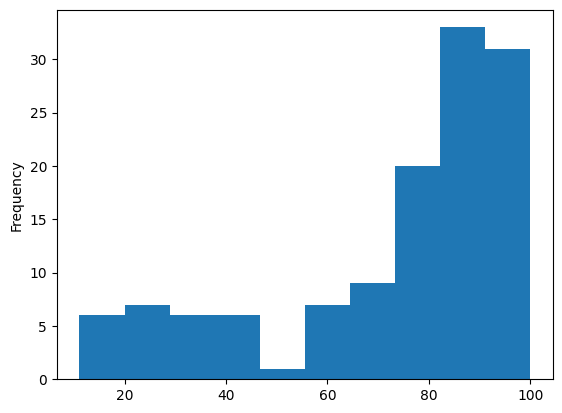

In [185]:
data['internet(%)-2023'].plot(kind="hist")

In [213]:
pais_filtrado = data.loc[data['internet(%)-2023'] == data['internet(%)-2023'].max(), 'pais']
continente_filtrado = data.loc[data['internet(%)-2023'] == data['internet(%)-2023'].max(), 'continente']
print(pais_filtrado, data['internet(%)-2023'].max(), continente_filtrado)

8                     Bahrain
101            Arabia Saudita
121    Emiratos Árabes Unidos
Name: pais, dtype: object 100.0 8      Asia
101    Asia
121    Asia
Name: continente, dtype: object


<Axes: >

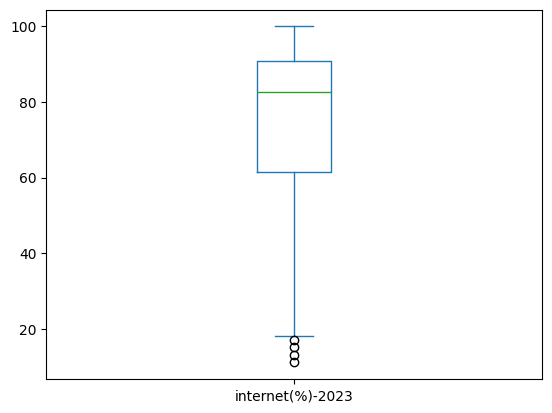

In [191]:
data['internet(%)-2023'].plot(kind="box")

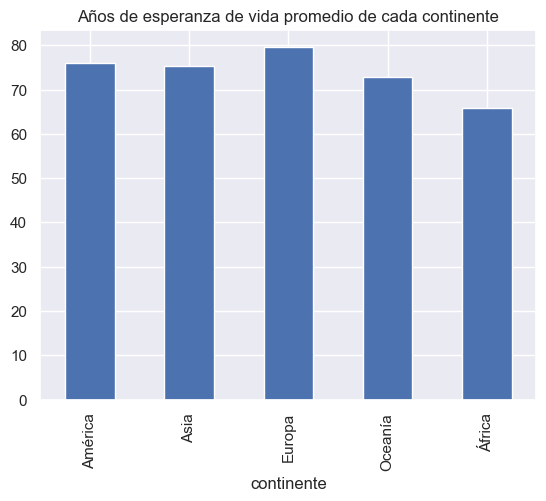

In [204]:
G = data.groupby("continente")
G["EV(age)-2020"].mean().plot(kind="bar") 
plt.title("Años de esperanza de vida promedio de cada continente")

plt.show()

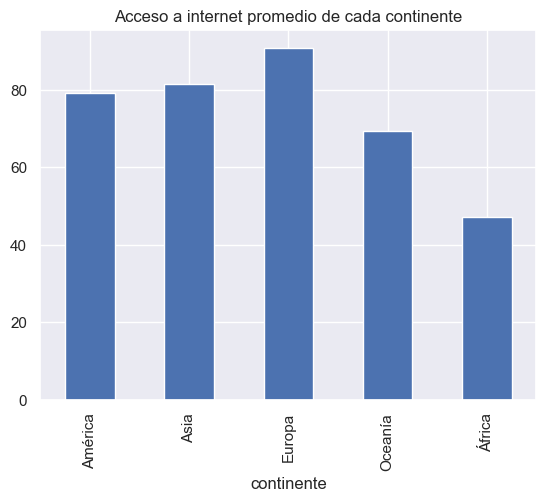

In [203]:
G = data.groupby("continente")
G["internet(%)-2023"].mean().plot(kind="bar")
plt.title("Acceso a internet promedio de cada continente")

plt.show()

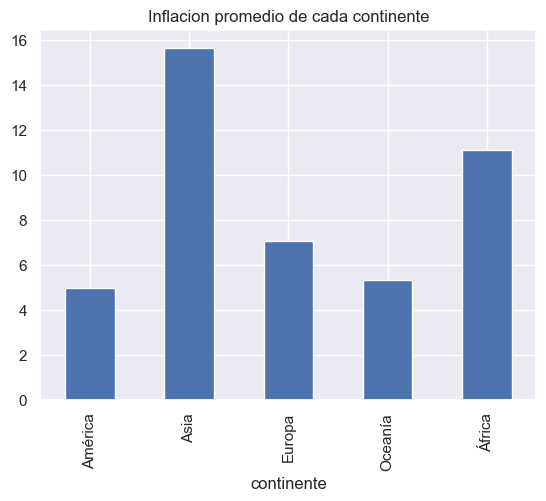

In [202]:
G = data.groupby("continente")
G["inflacion(%)-2023"].mean().plot(kind="bar")
plt.title("Inflacion promedio de cada continente")

plt.show()

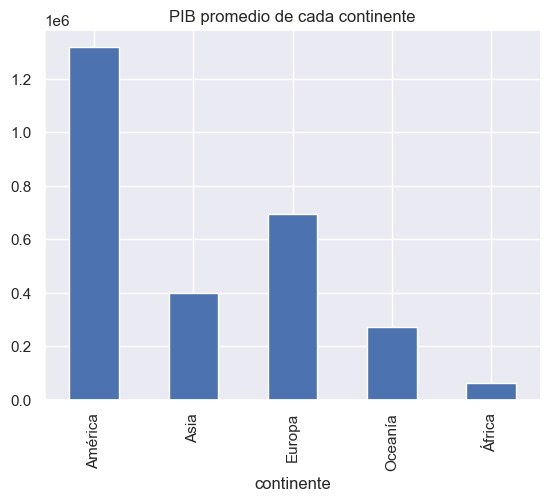

In [200]:
# PIB promedio de cada continente
G = data.groupby("continente")
G["PIB(anual, Eur)-2023"].mean().plot(kind="bar")
plt.title("PIB promedio de cada continente")

plt.show()


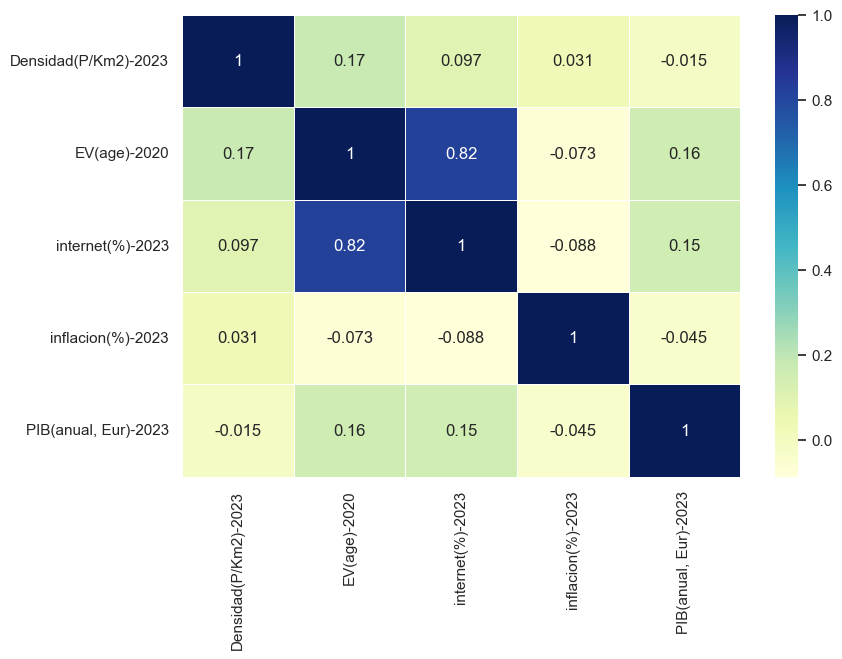

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# carga el data set
corr = data[var_cuanti].corr()

# mapa de calor
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, linewidths= .5, ax=ax, cmap="YlGnBu", annot=True)
plt.show()